In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

##### Plot the normalised returns on a Graph

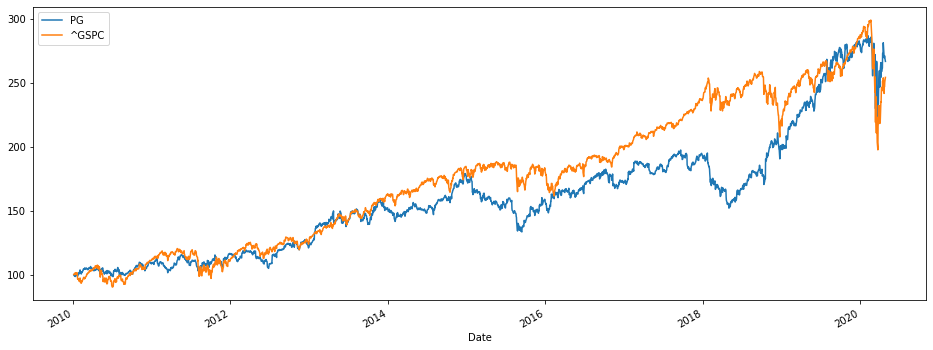

In [3]:
((pf_data / pf_data.iloc[0])* 100).plot(figsize=(16, 6))

##### Calculate the log adjusted returns, mean, variance as well as correlation

In [4]:
log_returns = np.log( pf_data / pf_data.shift(1))

In [5]:
(log_returns.mean() * 250).values

array([0.09445932, 0.0898268 ])

In [6]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029341,0.017784
^GSPC,0.017784,0.030101


In [7]:
log_returns.corr()         # no need to multiply by 250

,PG,^GSPC
PG,1.000000,0.598418
^GSPC,0.598418,1.000000


In [8]:
num_assets = len(assets)

num_assets

2

#                       The Markowitz Mean Variance Theory

In [9]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.0909636 , 0.09055646, 0.09188703, 0.09179907, 0.09214682,
        0.09186321, 0.09335115, 0.09240053, 0.09306328, 0.09134893,
        0.0916633 , 0.09316039, 0.09259323, 0.09335988, 0.0923083 ,
        0.09213291, 0.09170905, 0.08990959, 0.09337475, 0.09381049,
        0.09076808, 0.09266495, 0.09258199, 0.09233786, 0.09210713,
        0.09224169, 0.08990292, 0.09045121, 0.09247196, 0.09219043,
        0.09092257, 0.09213158, 0.0927175 , 0.0904569 , 0.09123514,
        0.09259773, 0.09371107, 0.09231373, 0.09026098, 0.0924373 ,
        0.09189516, 0.09130618, 0.09153129, 0.09198625, 0.09261132,
        0.09228841, 0.0915584 , 0.09212859, 0.09179041, 0.09174192,
        0.09213242, 0.09268761, 0.09400057, 0.09004225, 0.0934065 ,
        0.09251852, 0.09150978, 0.09092288, 0.09170966, 0.09077382,
        0.09442035, 0.09310047, 0.09193002, 0.09006276, 0.09421007,
        0.09115082, 0.09142309, 0.09222003, 0.09242904, 0.0933853 ,
        0.09074617, 0.09229269, 0.09227473, 0.09

In [10]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility' : pfolio_volatilities})

In [11]:
portfolios.head()

,Return,Volatility
0,0.090964,0.159668
1,0.090556,0.163748
2,0.091887,0.154491
3,0.091799,0.154728
4,0.092147,0.154117


In [12]:
portfolios.tail()

,Return,Volatility
995,0.091032,0.159089
996,0.092612,0.154661
997,0.092017,0.154244
998,0.090285,0.167027
999,0.092064,0.154183


Text(0, 0.5, 'Expected Return')

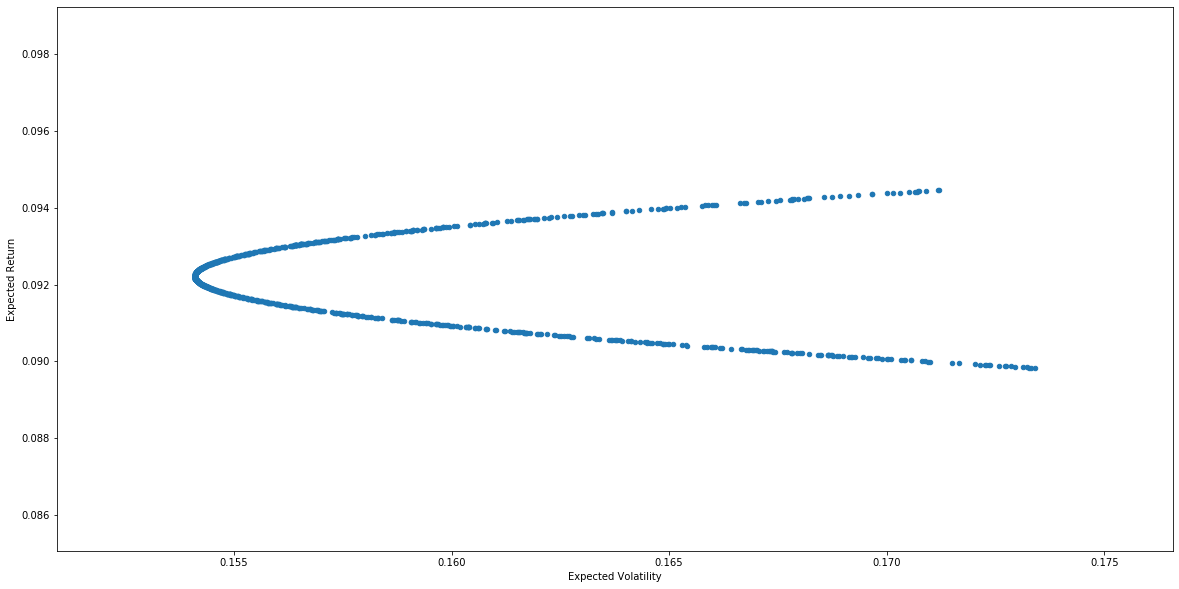

In [13]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(20, 10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')